# Concat the data
## - amazon

In [1]:
import pandas as pd

amazon = pd.read_csv('amazon_comment_seaweed_chip_result.csv')  # 아마존 데이터
amazon = amazon.drop(amazon.columns[0], axis = 1)
amazon.head()

,comment_author,star_rating,comment_date,comment_title,comment
0,Dmitry,1.0 out of 5 stars,"Reviewed in the United States on May 4, 2019",This is very dangerous product ! Do not buy !,"I've been buying this product for a year, I ..."
1,S A,1.0 out of 5 stars,"Reviewed in the United States on September 17,...",Bug eggs in package?!!,Thsee don't expire until December. I opened ...
2,Elisa S.,5.0 out of 5 stars,"Reviewed in the United States on December 17, ...",#1 on my list,The photo shows the seaweed brands I've trie...
3,Ani_Mon,1.0 out of 5 stars,"Reviewed in the United States on July 23, 2017",Oily and stale,The first time I bought these I fell in love...
4,Rachel Humphrey,5.0 out of 5 stars,"Reviewed in the United States on February 4, 2017",The BEST seasoned seaweed makers in the WORLD,I ate the entire box in a week. This stuff i...


In [2]:
# comment_date 자르기

def name_cut(x):
    x = x.split('on ')[1]
    return x  

amazon["comment_date"] = amazon["comment_date"].apply(name_cut)
amazon.head()

,comment_author,star_rating,comment_date,comment_title,comment
0,Dmitry,1.0 out of 5 stars,"May 4, 2019",This is very dangerous product ! Do not buy !,"I've been buying this product for a year, I ..."
1,S A,1.0 out of 5 stars,"September 17, 2018",Bug eggs in package?!!,Thsee don't expire until December. I opened ...
2,Elisa S.,5.0 out of 5 stars,"December 17, 2018",#1 on my list,The photo shows the seaweed brands I've trie...
3,Ani_Mon,1.0 out of 5 stars,"July 23, 2017",Oily and stale,The first time I bought these I fell in love...
4,Rachel Humphrey,5.0 out of 5 stars,"February 4, 2017",The BEST seasoned seaweed makers in the WORLD,I ate the entire box in a week. This stuff i...


In [3]:
# 평점 자르기

def name_cut(x):
    x = x.split(" out")[0]
    x = float(x)
    return x  

amazon["star_rating"] = amazon["star_rating"].apply(name_cut)
amazon.head()

,comment_author,star_rating,comment_date,comment_title,comment
0,Dmitry,1.0,"May 4, 2019",This is very dangerous product ! Do not buy !,"I've been buying this product for a year, I ..."
1,S A,1.0,"September 17, 2018",Bug eggs in package?!!,Thsee don't expire until December. I opened ...
2,Elisa S.,5.0,"December 17, 2018",#1 on my list,The photo shows the seaweed brands I've trie...
3,Ani_Mon,1.0,"July 23, 2017",Oily and stale,The first time I bought these I fell in love...
4,Rachel Humphrey,5.0,"February 4, 2017",The BEST seasoned seaweed makers in the WORLD,I ate the entire box in a week. This stuff i...


## - walmart

In [4]:
walmart = pd.read_csv('walmart.csv')  # 월마트 데이터
walmart.head()

,score,title,author,date,comment
0,5,Organic Seaweed Snacks Review,"Linda M.,",14-Jan-20,These seaweed snacks that I have tasted were d...
1,5,Iâm hooked!,"Cherlyn,",13-Mar-20,seen other people buying it. Thought I would t...
2,5,Organic Seaweed Snacks Review,"Chrystal A.,",08-Mar-20,My son loves seaweed but I want to be sure it'...
3,4,"Wasabi is best, but these come in 2nd","Idk,",07-Jul-20,I haven't tried all the flavors yet but wasabi...
4,4,Organic Seaweed Snacks Review,"Melissa M.,",27-Dec-19,Ocean's Halo seaweed snacks are great snacks t...


## - amazon + walmart review data 

In [5]:
# 아마존 + 월마트

review = pd.concat([amazon['comment'], walmart['comment']], axis = 0) ; review

0         I've been buying this product for a year, I ...
1         Thsee don't expire until December. I opened ...
2         The photo shows the seaweed brands I've trie...
3         The first time I bought these I fell in love...
4         I ate the entire box in a week. This stuff i...
                              ...                        
1932    I love Asian food and this brand is the best a...
1933    I purchased the Chili Lime. The consistency wa...
1934    I tried Ocean's Halo seaweed snack sheets. I l...
1935    These are a great and healthy option for snack...
1936                                           delicious!
Name: comment, Length: 5779, dtype: object

In [6]:
score = pd.concat([amazon['star_rating'], walmart['score']], axis = 0) ; score

0       1.0
1       1.0
2       5.0
3       1.0
4       5.0
       ... 
1932    5.0
1933    3.0
1934    5.0
1935    5.0
1936    5.0
Length: 5779, dtype: float64

In [7]:
author = pd.concat([amazon['comment_author'], walmart['author']], axis = 0) ; author

0                Dmitry
1                   S A
2              Elisa S.
3               Ani_Mon
4       Rachel Humphrey
             ...       
1932          Kiara L.,
1933       Rosemary M.,
1934            deb F.,
1935         Joanna A.,
1936           Garrett,
Length: 5779, dtype: object

In [8]:
date = pd.concat([amazon['comment_date'], walmart['date']], axis = 0) ; date

0              May 4, 2019
1       September 17, 2018
2        December 17, 2018
3            July 23, 2017
4         February 4, 2017
               ...        
1932             08-Jan-19
1933             20-Nov-18
1934             22-Jan-19
1935             30-Jan-19
1936             08-Aug-17
Length: 5779, dtype: object

In [9]:
title = pd.concat([amazon['comment_title'], walmart['title']], axis = 0) ; title

0       This is very dangerous product ! Do not buy !
1                              Bug eggs in package?!!
2                                       #1 on my list
3                                      Oily and stale
4       The BEST seasoned seaweed makers in the WORLD
                            ...                      
1932                    Organic Seaweed Snacks Review
1933                    Organic Seaweed Snacks Review
1934                    Organic Seaweed Snacks Review
1935                    Organic Seaweed Snacks Review
1936                                       delicious!
Length: 5779, dtype: object

In [10]:
review = pd.DataFrame({'date': date, 'title' : title, 'review': review, 'score': score, 'author': author})
review.head()

,date,title,review,score,author
0,"May 4, 2019",This is very dangerous product ! Do not buy !,"I've been buying this product for a year, I ...",1.0,Dmitry
1,"September 17, 2018",Bug eggs in package?!!,Thsee don't expire until December. I opened ...,1.0,S A
2,"December 17, 2018",#1 on my list,The photo shows the seaweed brands I've trie...,5.0,Elisa S.
3,"July 23, 2017",Oily and stale,The first time I bought these I fell in love...,1.0,Ani_Mon
4,"February 4, 2017",The BEST seasoned seaweed makers in the WORLD,I ate the entire box in a week. This stuff i...,5.0,Rachel Humphrey


# Preprocessing

In [11]:
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup 
import re
import numpy as np

#text cleaning
stop_words = set(stopwords.words("english"))

stop_words.update(("love", "loves", "great", "good", "better", "amazing", "buying", "found", "get", "like", "loved", 'maybe', 'may', 'could', 'awesome', 
                   'definitely', 'perfect' , 'best', 'okay', 'excellent', 'disappointed', 'right', 'nice', 'however', 'maybe', 'pretty', 'thank', 'wonderful', 'terrible', 
                   'unfortunately', 'awful', 'horrible', 'worst', 'wont', 'surprised', 'one', 'bad', 'actually', 'really', 'would',
                    'everybody', 'sometime', 'state', 'generally', 'edge', 'report', 'gross'
))

def text_cleaner(text,num):
    newString=str(text).lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:   #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [12]:
contraction_mapping = {"won't": "will not",  "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                       "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                       "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                       "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                       "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                       "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                       "you're": "you are", "you've": "you have"}

In [13]:
cleaning_text = []
for r in review['review']:
    cleaning_text.append(text_cleaner(r,0))

In [14]:
review['cleaned_text']=cleaning_text
review['cleaned_text'].head()

0    product year bought many times definetely give...
1    thsee expire december opened today looks bug e...
2    photo shows seaweed brands tried order prefere...
3    first time bought fell types seaweed snacks tr...
4    ate entire box week stuff delicious enjoy trad...
Name: cleaned_text, dtype: object

In [16]:
#visulazie the noumber of word

import matplotlib.pyplot as plt
#counting
n_of_text = []

for i in review['cleaned_text']:
    n_of_text.append(len(i.split()))

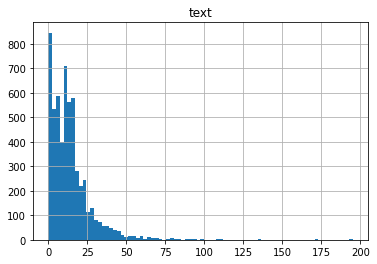

In [17]:
length = pd.DataFrame({'text' : n_of_text})
length.hist(bins = 80)
plt.rc('figure', figsize=(10, 5))
plt.show()

# Visualization: word frequency

<FreqDist with 5197 samples and 5779 outcomes>


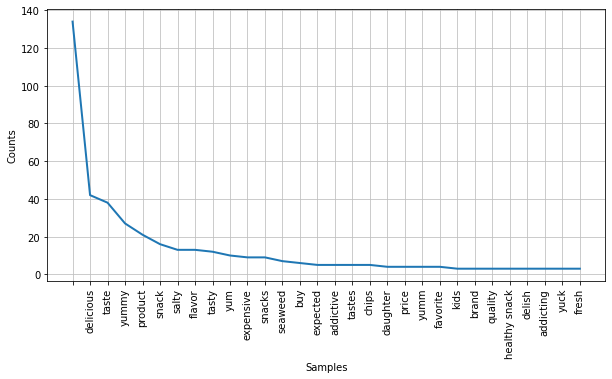

In [18]:
from nltk.probability import FreqDist
fdist = FreqDist(review['cleaned_text'])
print(fdist)

fdist.most_common(2)
fdist.plot(30,cumulative=False)
plt.show()

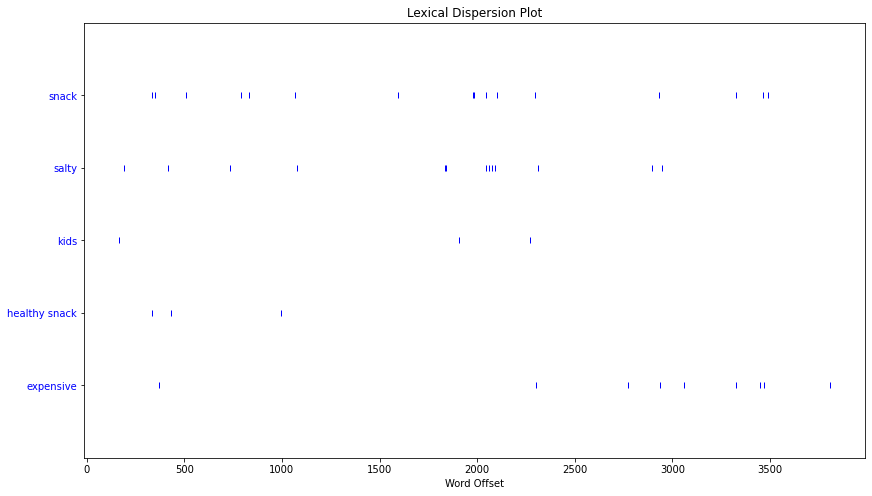

In [20]:
import nltk

plt.figure(figsize=(14,8))

myText = nltk.Text(review['cleaned_text'])

topics = ['snack', 'salty', 'kids', 'healthy snack', 'expensive']
myText.dispersion_plot(topics)

In [21]:
for topic in topics:   
    freqdist = nltk.FreqDist(review['cleaned_text'])
    print(topic,'more :', ' , '.join([ word.lower() for word, count in freqdist.most_common(5)]))

expensive more :  , delicious , taste , yummy , product
healthy snack more :  , delicious , taste , yummy , product
kids more :  , delicious , taste , yummy , product
salty more :  , delicious , taste , yummy , product
snack more :  , delicious , taste , yummy , product


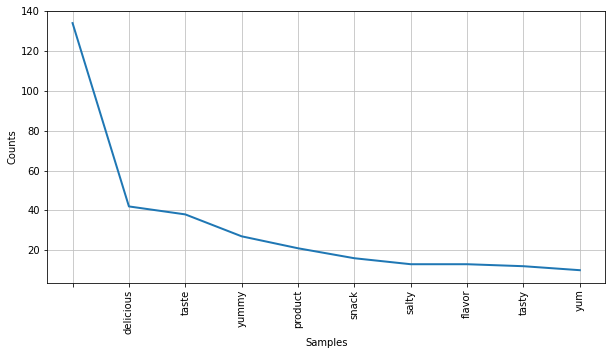

In [22]:
freqdist.plot(10)

In [23]:
tokenized_doc = review['cleaned_text'].apply(lambda x : x.split())

In [24]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = []

for t in tokenized_doc:
    tagged_list.append(pos_tag(t))

In [25]:
pos_tag = pd.DataFrame({'tagged_list': tagged_list})
pos_tag.head()

,tagged_list
0,"[(product, NN), (year, NN), (bought, VBD), (ma..."
1,"[(thsee, NN), (expire, NN), (december, NN), (o..."
2,"[(photo, NN), (shows, NNS), (seaweed, VBP), (b..."
3,"[(first, JJ), (time, NN), (bought, VBN), (fell..."
4,"[(ate, NN), (entire, JJ), (box, NN), (week, NN..."


In [26]:
def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)

pos_tag['tagged_list'].map(count_tags).head()

0    {'NN': 15, 'VBD': 4, 'JJ': 13, 'NNS': 2, 'RB':...
1    {'NN': 7, 'VBD': 1, 'VBZ': 1, 'NNS': 1, 'VBG':...
2    {'NN': 44, 'NNS': 6, 'VBP': 7, 'JJ': 21, 'RB':...
3    {'JJ': 5, 'NN': 10, 'VBN': 2, 'VBD': 2, 'NNS':...
4    {'NN': 19, 'JJ': 14, 'VBP': 6, 'FW': 1, 'NNS':...
Name: tagged_list, dtype: object

In [27]:
pos_tag['tag_counts'] = pos_tag['tagged_list'].map(count_tags)
pos_tag.head()

,tagged_list,tag_counts
0,"[(product, NN), (year, NN), (bought, VBD), (ma...","{'NN': 15, 'VBD': 4, 'JJ': 13, 'NNS': 2, 'RB':..."
1,"[(thsee, NN), (expire, NN), (december, NN), (o...","{'NN': 7, 'VBD': 1, 'VBZ': 1, 'NNS': 1, 'VBG':..."
2,"[(photo, NN), (shows, NNS), (seaweed, VBP), (b...","{'NN': 44, 'NNS': 6, 'VBP': 7, 'JJ': 21, 'RB':..."
3,"[(first, JJ), (time, NN), (bought, VBN), (fell...","{'JJ': 5, 'NN': 10, 'VBN': 2, 'VBD': 2, 'NNS':..."
4,"[(ate, NN), (entire, JJ), (box, NN), (week, NN...","{'NN': 19, 'JJ': 14, 'VBP': 6, 'FW': 1, 'NNS':..."


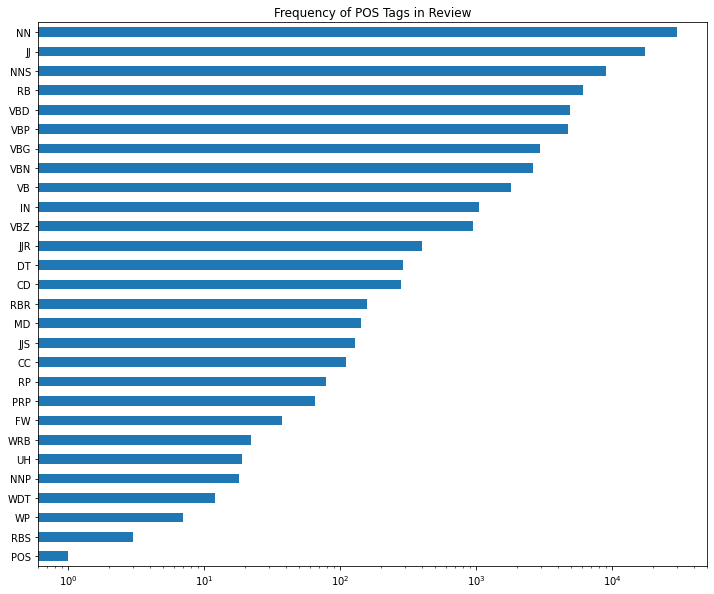

In [28]:
tag_set = list(set([tag for tags in pos_tag['tag_counts'] for tag in tags]))
for tag in tag_set:
    pos_tag[tag] = pos_tag['tag_counts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Review'    
pos_tag[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,10), title=title)

In [29]:
vocabulary = {}
for row in pos_tag['tagged_list']:
    for word, tag in row:
        if word in vocabulary:
            if tag in vocabulary[word]:
                vocabulary[word][tag] += 1
            else:
                vocabulary[word][tag] = 1
        else:
            vocabulary[word] = {tag: 1}
vocabulary_df = pd.DataFrame.from_dict(vocabulary, orient='index')
vocabulary_df.fillna(value=0, inplace=True)
tag = 'NNP' # NNP: Proper noun, singular 
vocabulary_df.sort_values(by=tag, ascending=False).head(10)

,NN,VBD,VBN,RB,JJ,NNS,VBP,VB,CD,VBG,...,RBS,DT,FW,NNP,WDT,UH,PRP,WRB,WP,POS
kick,28.0,0.0,0.0,0.0,14.0,1.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
know,3.0,0.0,0.0,0.0,20.0,7.0,112.0,33.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
kfordhealth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
kirkland,8.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,115.0,0.0,0.0,21.0,30.0,14.0,14.0,4.0,6.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
tell,12.0,0.0,0.0,0.0,1.0,0.0,14.0,21.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
kaki,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
mart,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
quality,94.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
yolk,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


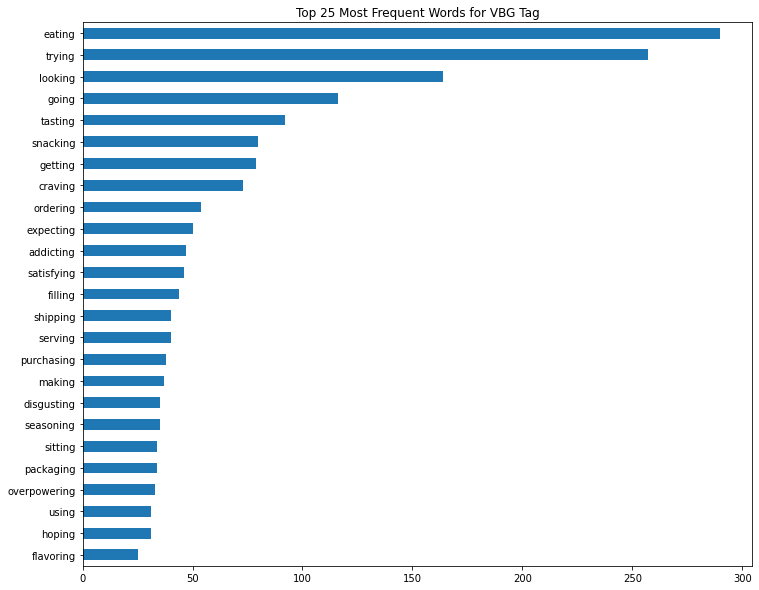

In [30]:
size = 25
tag = 'VBG' # VBG: Verb, gerund or present participle
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,10), title=title)

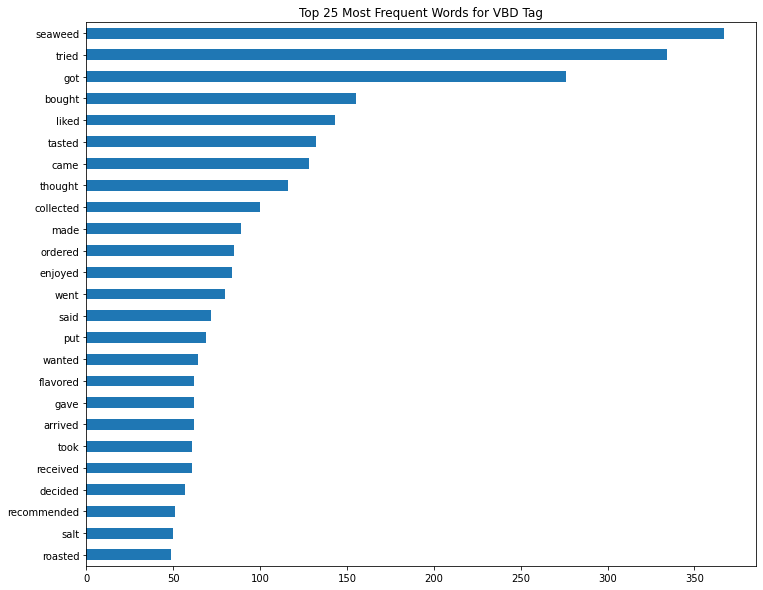

In [31]:
size = 25
tag = 'VBD' 
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,10), title=title)

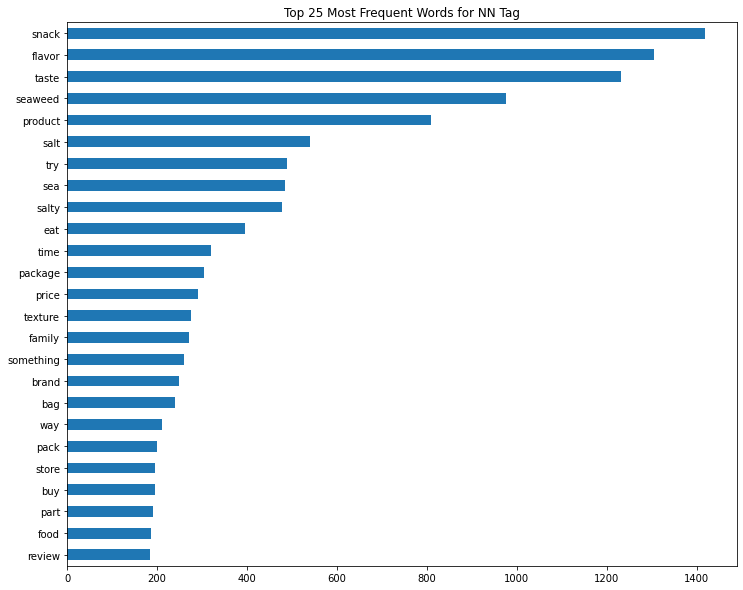

In [32]:
size = 25
tag = 'NN'
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,10), title=title)

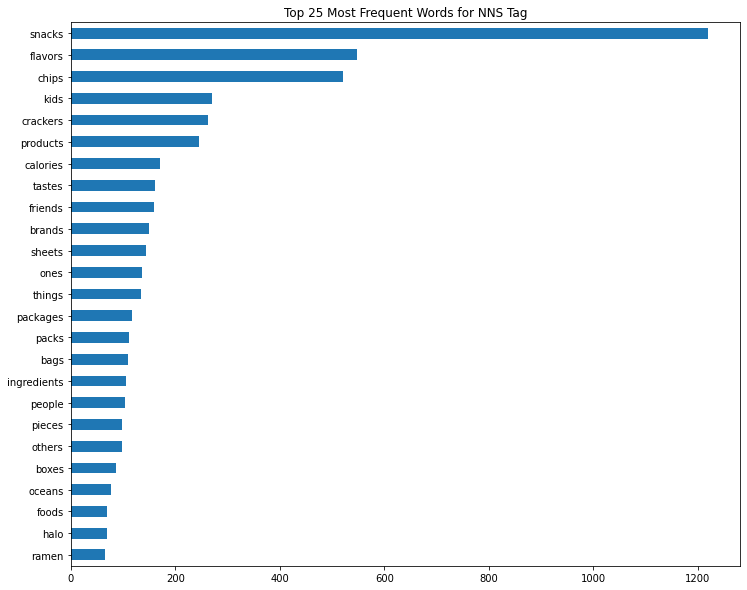

In [33]:
size = 25
tag = 'NNS' 
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,10), title=title)

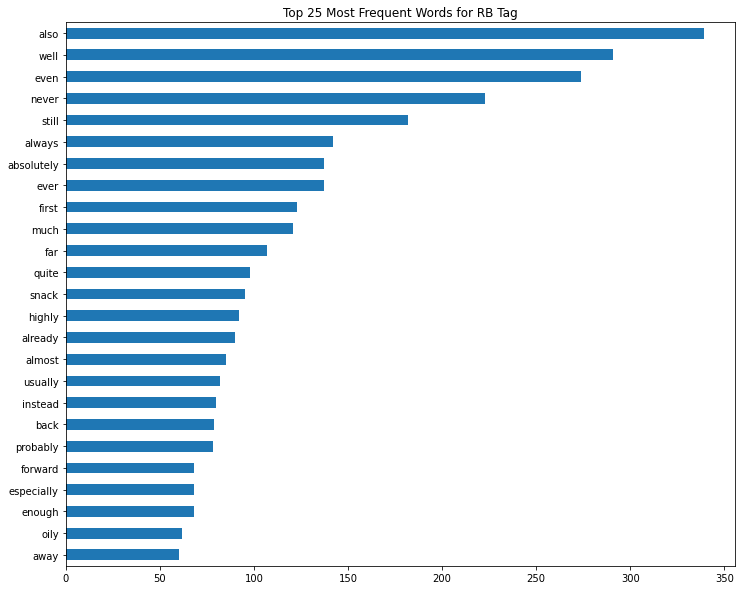

In [34]:
size = 25
tag = 'RB' 
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,10), title=title)

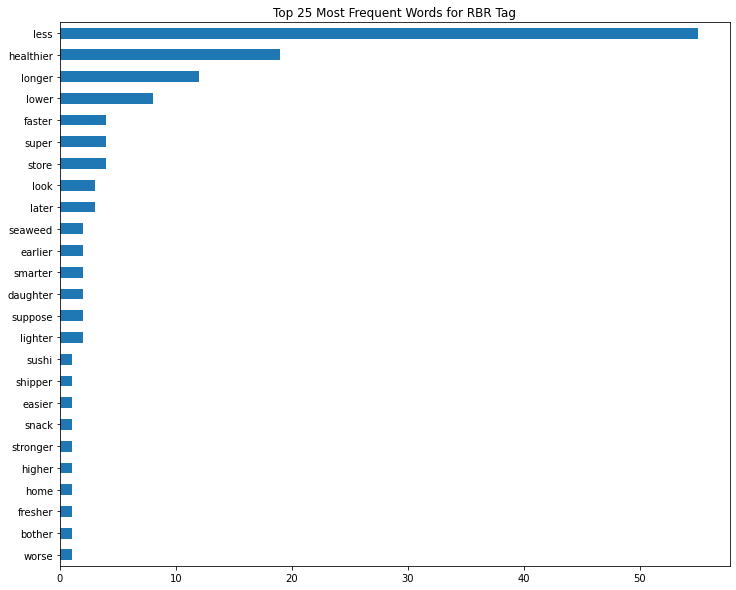

In [35]:
size = 25
tag = 'RBR' 
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,10), title=title)

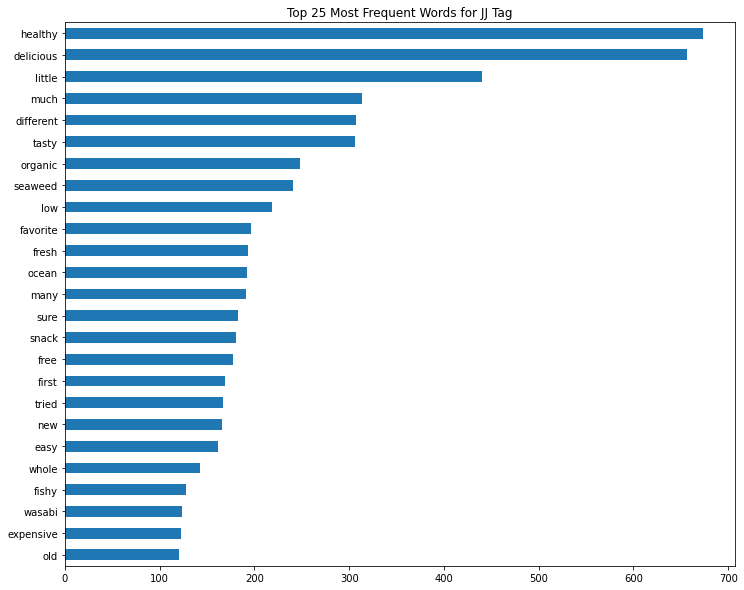

In [36]:
size = 25
tag = 'JJ'
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,10), title=title)

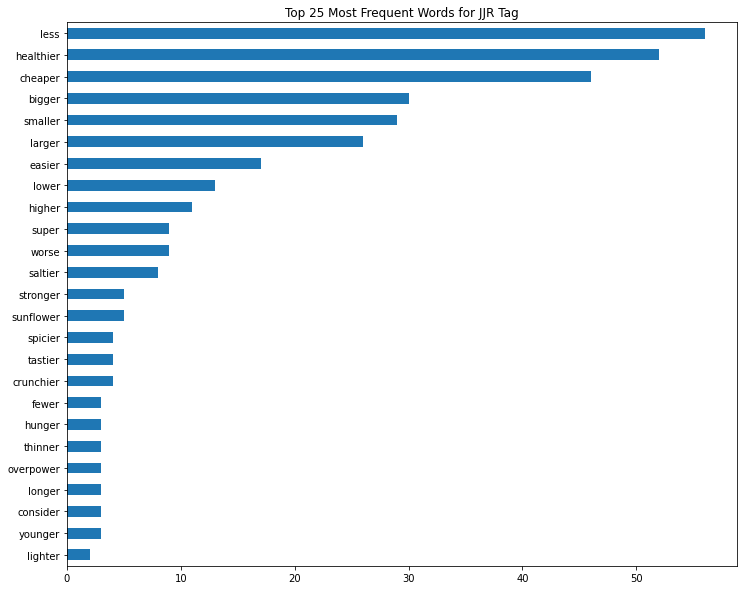

In [37]:
size = 25
tag = 'JJR' 
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,10), title=title)

# gender identification by name using gender-guesser

In [38]:
import gender_guesser.detector as gender

g = gender.Detector()

print(g.get_gender(u"Bob"))

male


In [39]:
review['author']

0                Dmitry
1                   S A
2              Elisa S.
3               Ani_Mon
4       Rachel Humphrey
             ...       
1932          Kiara L.,
1933       Rosemary M.,
1934            deb F.,
1935         Joanna A.,
1936           Garrett,
Name: author, Length: 5779, dtype: object

In [40]:
gender = []

for a in review['author']:
    gender.append(g.get_gender(a))  

In [41]:
while 'unknown' in gender:
    gender.remove('unknown')

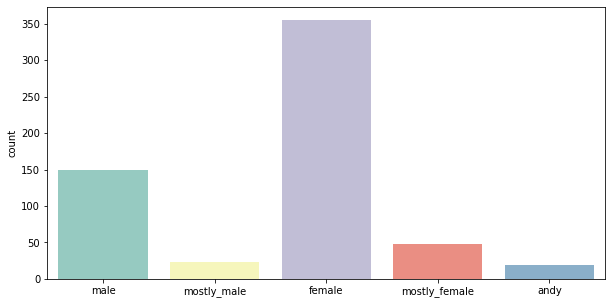

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(gender,  palette = 'Set3')
plt.rc('figure', figsize=(14, 10))
plt.show()